In [2]:
import sys
sys.path.append("../TrajAtlas/")
sys.path.append("../TrajAtlas/utils/")
import attr_util as utils

ModuleNotFoundError: No module named 'attr_util'

In [3]:
import attr_update2 as utils_update

ModuleNotFoundError: No module named 'attr_update2'

In [1]:
import TrajAtlas as tja
import scanpy as sc
from cnmf import cNMF
import numpy as np
import pandas as pd

2024-09-24 21:50:07.891162: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-24 21:50:08.743424: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
 captum (see https://github.com/pytorch/captum).


In [10]:
adata = sc.read("../../3.9_wt_integrate/7.6_software/3.15_trajAtlas/data/3.19_adata_immediate_step1.h5ad")

In [26]:
usage_matrix_file = "../../3.9_wt_integrate/7.6_software/3.15_trajAtlas/process/GEP/GEP.usages.k_6.dt_0_1.consensus.txt"
gene_scores_file = "../../3.9_wt_integrate/7.6_software/3.15_trajAtlas/process/GEP/GEP.gene_spectra_score.k_6.dt_0_1.txt"
usage=pd.read_table(usage_matrix_file,index_col=0)
genescore=pd.read_table(gene_scores_file,index_col=0)
usage.columns = "pattern" + usage.columns.astype("str")
adata.obs[usage.columns] = usage

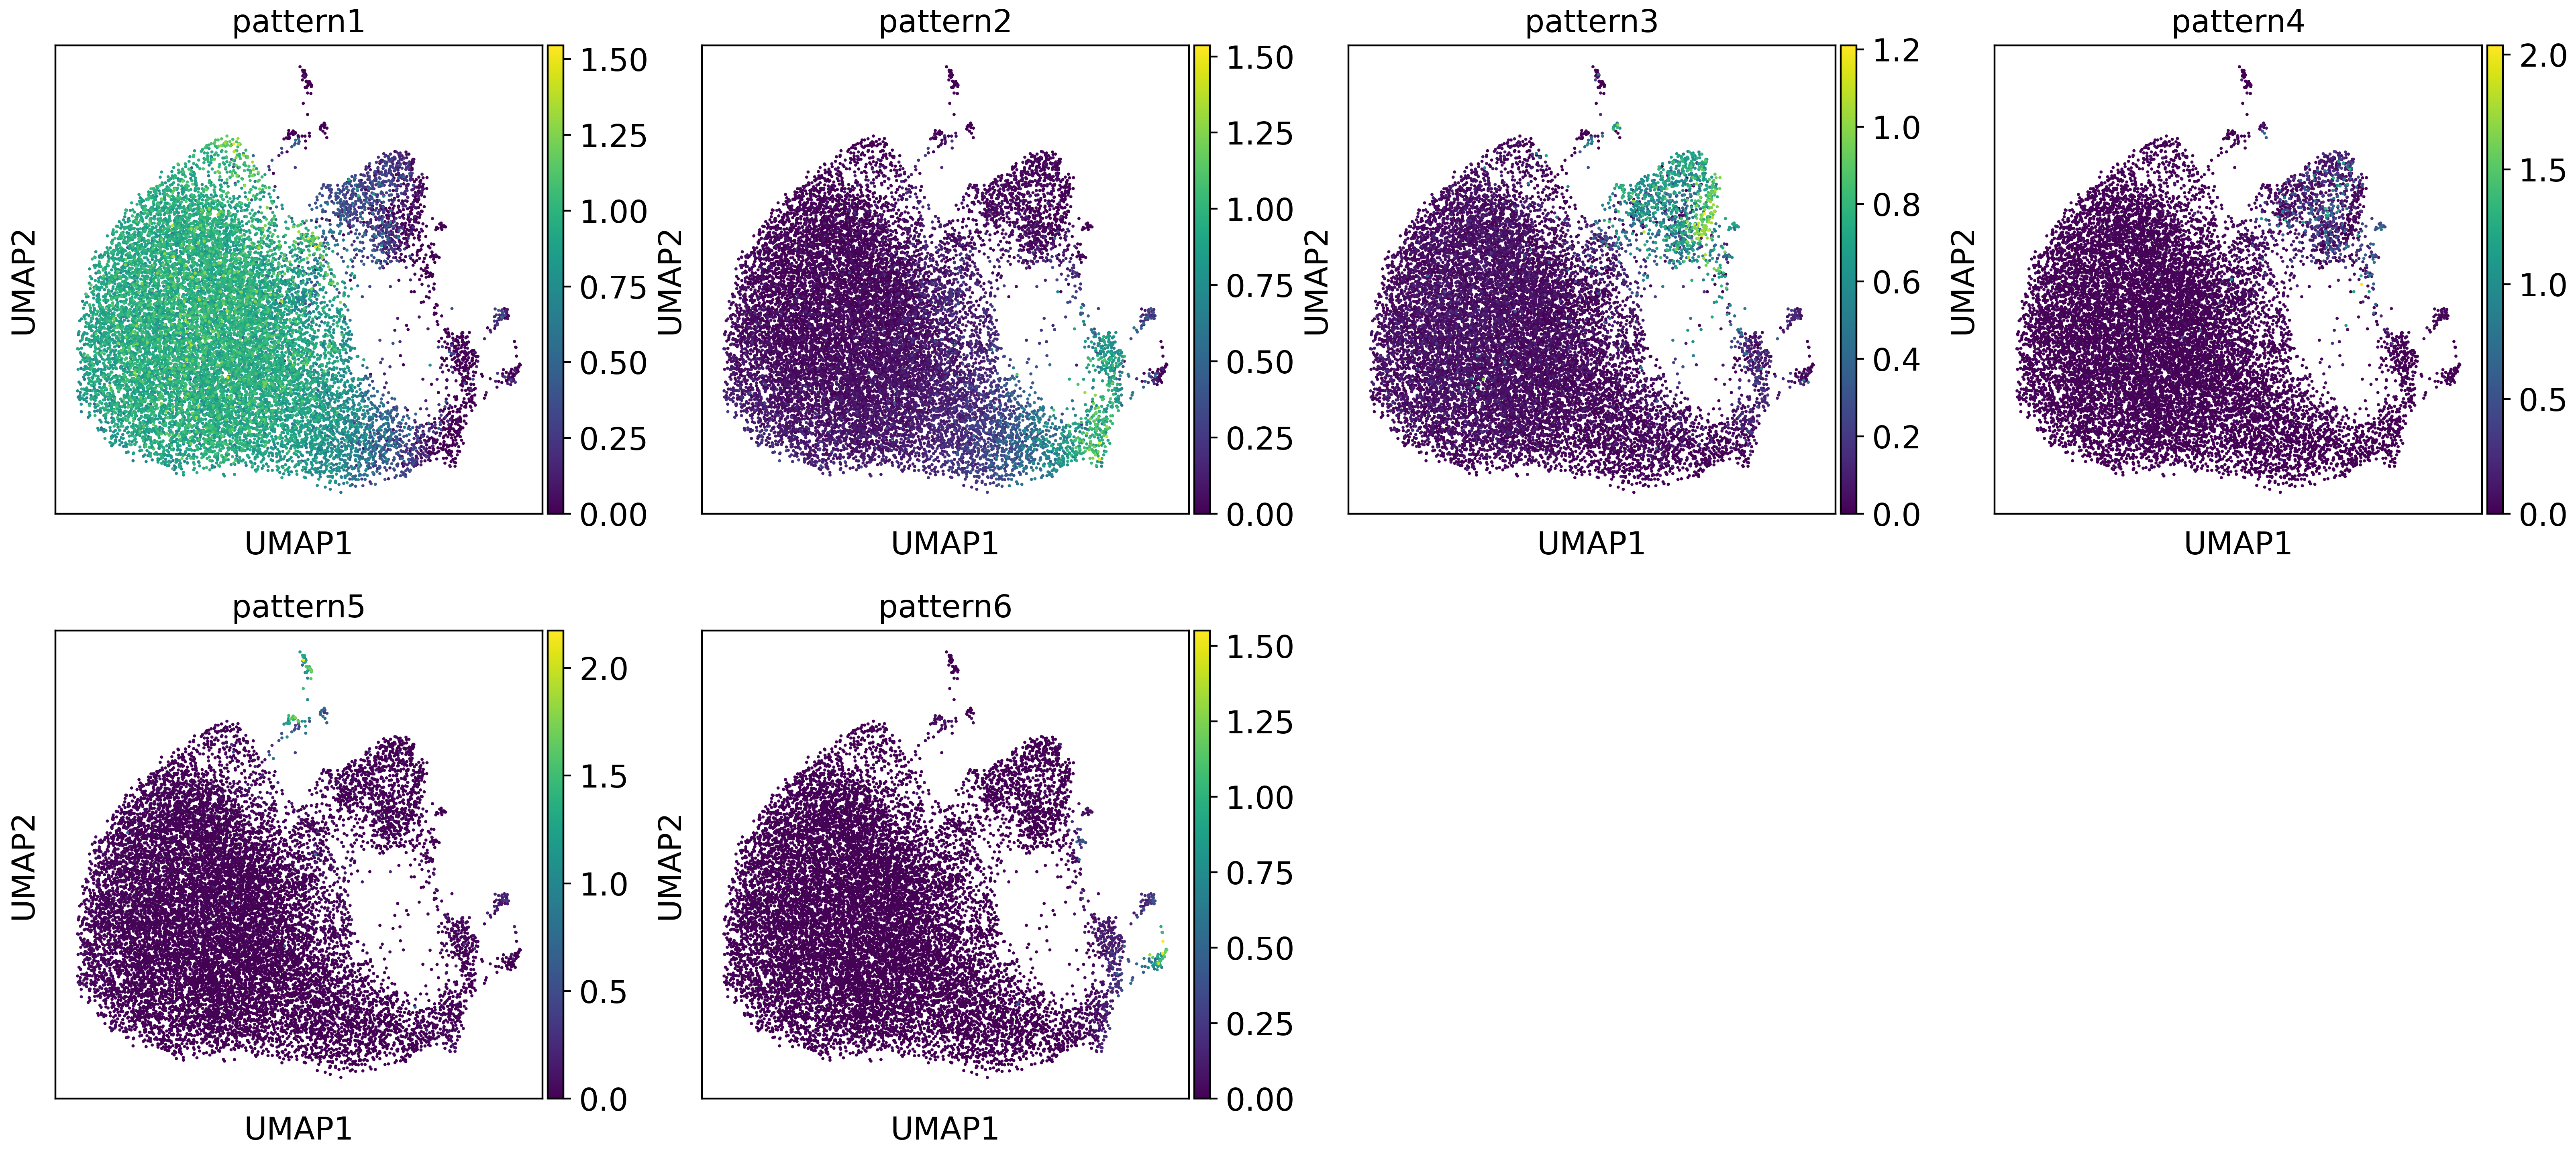

In [22]:

sc.pl.umap(adata,color=usage.columns)

In [23]:
#usage.columns = "pattern" + usage.columns.astype("str")

In [27]:
genescore=genescore.T
genescore = genescore.dropna()
genescore.columns = usage.columns
max_column = np.argmax(genescore.values, axis=1)
genePatternIndex = genescore.columns[max_column]
adata.var["pattern"]=np.nan
adata.var["pattern"].loc[genescore.index] =genePatternIndex

/tmp/ipykernel_1565517/3140166720.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adata.var["pattern"].loc[genescore.index] =genePatternIndex
/tmp/ipykernel_1565517/3140166720.py:7: SettingWithCopyWarning: 
A value is trying to be set on

In [28]:
adata.var["pattern"]

Rp1              pattern6
Sox17            pattern5
Gm37587               NaN
Gm37323          pattern2
Mrpl15           pattern4
                   ...   
Gm41625               NaN
Gm41693          pattern5
4930526L06Rik         NaN
4931403E22Rik    pattern2
Fthl17f          pattern1
Name: pattern, Length: 22076, dtype: object

In [19]:
genescore.columns[max_column]

Index(['6', '5', '2', '4', '5', '1', '1', '2', '1', '5',
       ...
       '1', '2', '1', '1', '1', '1', '2', '5', '2', '1'],
      dtype='object', length=20638)

In [17]:
adata.var["pattern"]

Rp1                6
Sox17              5
Gm37587          NaN
Gm37323            2
Mrpl15             4
                ... 
Gm41625          NaN
Gm41693            5
4930526L06Rik    NaN
4931403E22Rik      2
Fthl17f            1
Name: pattern, Length: 22076, dtype: object

In [16]:
adata

AnnData object with n_obs × n_vars = 15079 × 22076
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent_mito', 'RNA_snn_res.0.5', 'seurat_clusters', 'group', 'sample', 'pseduoPred', 'pred_level1_anno', 'pred_level2_anno', 'pred_level3_anno', 'pred_level4_anno', 'pred_level5_anno', 'pred_level6_anno', 'pred_level7_anno', 'pred_lineage_fibro', 'pred_lineage_lepr', 'pred_lineage_msc', 'pred_lineage_chondro', 'lineageSum', 'Cell', 'pattern1', 'pattern2', 'pattern3', 'pattern4', 'pattern5', 'pattern6'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'pattern'
    uns: 'group_colors', 'neighbors', 'pred_level2_anno_colors', 'pred_level3_anno_colors', 'pred_lineage_chondro_colors', 'pred_lineage_fibro_colors', 'pred_lineage_lepr_colors', 'pred_lineage_msc_colors', 'umap'
    obsm: 'X_umap', 'scANVI'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [84]:
import attr_update11 as utils_update

In [85]:
# Perform bootstrapped attribute extraction
mdata = utils_update.getAttributeGEP_Bootstrap(
    adata=adata,
    featureKey="pattern",
    sampleKey="sample",
    patternKey=["pattern1"],
    cell_threshold=40,
    njobs=20,
    bootstrap_iterations=2
)


/home/gilberthan/anaconda3/envs/py311/lib/python3.11/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/gilberthan/anaconda3/envs/py311/lib/python3.11/site-packages/TrajAtlas/utils/attr_util.py:163: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sampleDf = adata.obs.groupby(sampleKey)['Cell'].agg(list).reset_index()
Processing Samples: 100%|██████████| 10/10 [00:17<00:00,  1.71s/it]
/home/gilberthan/anaconda3/envs/py311/lib/python3.11/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in sqrt
  result = func(self.values, **kwargs)
/home/gilberthan/anaconda3/envs/py311/lib/python3.11/site-packages/mudata/_core/mudata.py:491:

In [88]:
mdata["corr_bootstrap"].obs_names

Index(['BmscAging_Young_MA1_bootstrap_0', 'BmscAging_Young_MA2_bootstrap_0',
       'BmscAging_Young_MA3_bootstrap_0', 'BmscAging_Young_MA4_bootstrap_0',
       'BmscAging_Young_MA5_bootstrap_0', 'BmscAging_Young_Young1_bootstrap_0',
       'BmscAging_Young_Young2_bootstrap_0',
       'BmscAging_Young_Young3_bootstrap_0',
       'BmscAging_Young_Young4_bootstrap_0',
       'BmscAging_Young_Young5_bootstrap_0', 'BmscAging_Young_MA1_bootstrap_1',
       'BmscAging_Young_MA2_bootstrap_1', 'BmscAging_Young_MA3_bootstrap_1',
       'BmscAging_Young_MA4_bootstrap_1', 'BmscAging_Young_MA5_bootstrap_1',
       'BmscAging_Young_Young1_bootstrap_1',
       'BmscAging_Young_Young2_bootstrap_1',
       'BmscAging_Young_Young3_bootstrap_1',
       'BmscAging_Young_Young4_bootstrap_1',
       'BmscAging_Young_Young5_bootstrap_1'],
      dtype='object')

In [79]:
sc.concat([mdata["corr_bootstrap_0"],mdata["corr_bootstrap_1"]],axis = 0)

/home/gilberthan/anaconda3/envs/py311/lib/python3.11/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 20 × 9669
    layers: 'mod'

In [98]:
import attr_util4 as utils

In [99]:
# Perform bootstrapped attribute extraction
mdata2 = utils.getAttributeGEP_Bootstrap(
    adata=adata,
    featureKey="pattern",
    sampleKey="sample",
    patternKey=["pattern1"],
    cell_threshold=40,
    njobs=20,
    bootstrap_iterations=2
)


/home/gilberthan/anaconda3/envs/py311/lib/python3.11/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/gilberthan/Desktop/disk1/limb/TrajAtlas/notebooks/../TrajAtlas/utils/attr_util4.py:166: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sampleDf = adata.obs.groupby(sampleKey)['Cell'].agg(list).reset_index()
Processing Samples: 100%|██████████| 10/10 [00:17<00:00,  1.73s/it]
/home/gilberthan/anaconda3/envs/py311/lib/python3.11/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in sqrt
  result = func(self.values, **kwargs)
/home/gilberthan/anaconda3/envs/py311/lib/python3.11/site-packages/mudata/_core/mudata.py:491: UserWa

In [154]:
# Perform bootstrapped attribute extraction
mdata3 = utils.getAttributeGEP_Bootstrap(
    adata=adata,
    featureKey="pattern",
    sampleKey="sample",
    patternKey=["pattern1"],
    cell_threshold=40,
    njobs=20,
    bootstrap_iterations=2
)


/home/gilberthan/anaconda3/envs/py311/lib/python3.11/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/gilberthan/Desktop/disk1/limb/TrajAtlas/notebooks/../TrajAtlas/utils/attr_util16.py:157: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sampleDf = adata.obs.groupby(sampleKey)['Cell'].agg(list).reset_index()
Processing Samples:   0%|          | 0/10 [00:00<?, ?it/s]2024-09-24 18:12:53.240740: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-09-24 18:12:53.304246: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-09-24 18:12:53.307182: W tensorflow/compiler/tf2te

In [100]:
mdata2

MuData object with n_obs × n_vars = 20 × 14874
  3 modalities
    corr_bootstrap:	20 x 4958
      obs:	'sample'
      layers:	'mod'
    expr_bootstrap:	20 x 4958
      obs:	'sample'
      layers:	'mod'
    peak_bootstrap:	20 x 4958
      obs:	'sample'
      layers:	'mod'

In [ ]:
utils.attrANOVA()

In [111]:

np.array(design.loc[mdata2["corr_bootstrap"].obs["sample"]]["group"])

array(['MA', 'MA', 'MA', 'MA', 'MA', 'Young', 'Young', 'Young', 'Young',
       'Young', 'MA', 'MA', 'MA', 'MA', 'MA', 'Young', 'Young', 'Young',
       'Young', 'Young'], dtype=object)

In [112]:
design =  adata.obs[["sample","group"]].drop_duplicates()
design=design.set_index("sample")
mdata2["corr_bootstrap"].obs["group"]=np.array(design.loc[mdata2["corr_bootstrap"].obs["sample"]]["group"])

In [155]:
import attr_util17 as utils

In [147]:
valid_feature_names["Nkx6-1"]

'Nkx6_1'

In [151]:
ad = mdata2["corr_bootstrap"]
corr_df = pd.DataFrame(ad.X, index=ad.obs_names, columns=ad.var_names)
corr_df['group'] = ad.obs["group"]
from statsmodels.formula.api import ols
import statsmodels.api as sm

valid_feature_names = {}
for feature in corr_df.columns[:-1]:  # Exclude 'group' column
    # Replace spaces with underscores
    valid_name = feature.replace(' ', '_')
    # Prefix with 'gene_' if it starts with a digit or contains invalid characters
    if not valid_name[0].isalpha() and valid_name[0] != '_':
        valid_name = f'gene_{valid_name}'
    # Replace invalid characters for formula
    valid_name = valid_name.replace('-', '_').replace('.', '_')
    valid_feature_names[feature] = valid_name

# Rename columns in the DataFrame
corr_df.rename(columns=valid_feature_names, inplace=True)

results = []
for feature in corr_df.columns[:-1]:  # Exclude the 'group' column
    try:
        formula = f'{feature} ~ C(group)'
        model = ols(formula, data=corr_df).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        f_stat = anova_table['F'].iloc[0]
        p_value = anova_table['PR(>F)'].iloc[0]
        results.append({'Feature': feature, 'F-statistic': f_stat, 'P-value': p_value})
    except Exception as e:
        print(f"Error processing feature {feature}: {e}")

results_df = pd.DataFrame(results)

/home/gilberthan/anaconda3/envs/py311/lib/python3.11/site-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/home/gilberthan/anaconda3/envs/py311/lib/python3.11/site-packages/statsmodels/base/model.py:1925: RuntimeWarning: invalid value encountered in divide
  F /= J
/home/gilberthan/anaconda3/envs/py311/lib/python3.11/site-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/home/gilberthan/anaconda3/envs/py311/lib/python3.11/site-packages/statsmodels/base/model.py:1925: RuntimeWarning: invalid value encountered in divide
  F /= J
/home/gilberthan/anaconda3/envs/py311/lib/python3.11/site-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of const

In [139]:
anova_table['F'].iloc[0]

1.819051185435726

In [126]:
results_df.sort_values("P-value")

Feature  F-statistic       P-value
4210               Cbln2   135.860281  8.049526e-10
4262                Fth1    82.866033  3.716207e-08
2923             Gm11627    80.130459  4.772381e-08
1536               Timp4    68.726177  1.470145e-07
571               Snhg11    64.682845  2.272148e-07
...                  ...          ...           ...
4836             Gm26628          NaN           NaN
4844             Gm40761          NaN           NaN
4872             Trim43b          NaN           NaN
4886  gene_9330158H04Rik          NaN           NaN
4901               Acsm4          NaN           NaN

[4910 rows x 3 columns]

In [158]:
import attr_util18 as utils

In [159]:
utils.attrANOVA(mdata2["corr_bootstrap"],group_labels = mdata2["corr_bootstrap"].obs["group"])

Feature  F-statistic   P-value
0                  Tcea1     0.161579  0.692439
1                  Rgs20     1.913439  0.183500
2                Atp6v1h     3.208499  0.090087
3                   St18     1.753326  0.202028
4                 Pcmtd1     3.917002  0.063305
...                  ...          ...       ...
4953             Gm47157     1.117107  0.304522
4954               Itih4     2.248229  0.151102
4955  gene_1700120O09Rik     2.048126  0.169527
4956             Gm49165     1.966481  0.177833
4957             Fthl17f     1.819051  0.194152

[4958 rows x 3 columns]

In [ ]:
design =  adata.obs[["sample","group"]].drop_duplicates()
group1Name =design["sample"][design['group']=="Young"]
group2Name =design["sample"][design['group']=="MA"]
design=design.set_index("sample")
tvMap.obs["group"]=design.loc[tvMap.obs_names]
groupObs = tvMap.obs

In [82]:
import mudata as mu

In [46]:
sampleKey = "sample"
resampled_indices = []
for sample in adata.obs[sampleKey].unique():
    sample_mask = adata.obs[sampleKey] == sample
    sample_indices = np.where(sample_mask)[0]
    resampled_sample = np.random.choice(sample_indices, size=len(sample_indices), replace=True)
    resampled_indices.extend(resampled_sample)

In [48]:
resampled_adata = adata[resampled_indices].copy()

/home/gilberthan/anaconda3/envs/py311/lib/python3.11/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [52]:
resampled_adata.obs_names

Index(['TTCGATTAGCCATTCA-1_1', 'GGGCCATCAACCGCCA-1_1', 'ACTTATCGTGGATTTC-1_1',
       'TCCGTGTCAGTTAAAG-1_1', 'CTCATCGCAAGAGTTA-1_1', 'TGGCGTGTCCAGTTCC-1_1',
       'GTTCCGTGTGCCCACA-1_1', 'AGGGTCCAGTCACACT-1_1', 'AGACAGGTCAGGAAAT-1_1',
       'GTGTTAGGTAGGTACG-1_1',
       ...
       'TGTTTGTAGCAATAAC-1_14', 'TCGTGCTGTGATACTC-1_14',
       'TACCTGCAGGAAAGGT-1_14', 'ATTCCCGAGTGGTGGT-1_14',
       'ATCATTCAGTGCGACA-1_14', 'TGATTCTCATCGGTTA-1_14',
       'GCCCGAATCAGCCCAG-1_14', 'CCCTAACAGTCATTGC-1_14',
       'GGGTGAAAGCATCAGG-1_14', 'AAAGAACCAAAGCGTG-1_14'],
      dtype='object', length=15079)

In [53]:
resampled_adata

AnnData object with n_obs × n_vars = 15079 × 22076
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent_mito', 'RNA_snn_res.0.5', 'seurat_clusters', 'group', 'sample', 'pseduoPred', 'pred_level1_anno', 'pred_level2_anno', 'pred_level3_anno', 'pred_level4_anno', 'pred_level5_anno', 'pred_level6_anno', 'pred_level7_anno', 'pred_lineage_fibro', 'pred_lineage_lepr', 'pred_lineage_msc', 'pred_lineage_chondro', 'lineageSum', 'Cell', 'pattern1', 'pattern2', 'pattern3', 'pattern4', 'pattern5', 'pattern6'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'pattern'
    uns: 'group_colors', 'neighbors', 'pred_level2_anno_colors', 'pred_level3_anno_colors', 'pred_lineage_chondro_colors', 'pred_lineage_fibro_colors', 'pred_lineage_lepr_colors', 'pred_lineage_msc_colors', 'umap'
    obsm: 'X_umap', 'scANVI'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

## test base function

In [15]:
import attr_base7 as attr

In [29]:
adata_small = adata[1:3000,0:3000]

In [20]:
adata_small.var["pattern"]

Rp1              patternpattern6
Sox17            patternpattern5
Gm37587                      NaN
Gm37323          patternpattern2
Mrpl15           patternpattern4
                      ...       
4930579G24Rik    patternpattern3
Rxfp1                        NaN
Tmem144          patternpattern3
Gask1b           patternpattern5
Gria2            patternpattern3
Name: pattern, Length: 3000, dtype: object

In [32]:
mdata4 = attr.getAttributeGEP(
    adata=adata_small,
    featureKey="pattern",
    sampleKey="sample",
    patternKey=["pattern1"],
    cell_threshold=40,
    njobs=20,
    bootstrap_iterations=2
)

/home/gilberthan/Desktop/disk1/limb/TrajAtlas/notebooks/../TrajAtlas/utils/attr_base7.py:180: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sampleDf = adata.obs.groupby(sampleKey)['Cell'].agg(list).reset_index()
Processing Samples:   0%|          | 0/2 [00:00<?, ?it/s]/home/gilberthan/anaconda3/envs/py311/lib/python3.11/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/gilberthan/anaconda3/envs/py311/lib/python3.11/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
Processing Samples:  50%|█████     | 1/2 [00:00<00:00,  1.03it/s]/home/

In [31]:
mdata4

MuData object with n_obs × n_vars = 4 × 2076
  3 modalities
    corr:	4 x 692
      layers:	'raw', 'mod'
    expr:	4 x 692
      layers:	'raw', 'mod'
    peak:	4 x 692
      layers:	'raw', 'mod'

In [172]:
test = attr.getAttributeBase(adata=adata,axis_key="pattern1",bootstrap_iterations=2)

/home/gilberthan/Desktop/disk1/limb/TrajAtlas/notebooks/../TrajAtlas/utils/attr_base5.py:171: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sampleDf = adata.obs.groupby(sampleKey)['Cell'].agg(list).reset_index()
Processing Samples:   0%|          | 0/10 [00:00<?, ?it/s]/home/gilberthan/anaconda3/envs/py311/lib/python3.11/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/gilberthan/anaconda3/envs/py311/lib/python3.11/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
Processing Samples:  10%|█         | 1/10 [00:13<02:03, 13.77s/it]/hom

TypeError: Setting a MultiIndex dtype to anything other than object is not supported

In [173]:
test

MuData object with n_obs × n_vars = 10 × 66228
  3 modalities
    corr:	10 x 22076
      layers:	'raw', 'mod'
    expr:	10 x 22076
      layers:	'raw', 'mod'
    peak:	10 x 22076
      layers:	'raw', 'mod'

In [183]:
test2 = attr.getAttributeBase(adata=adata_small,axis_key="pattern1",bootstrap_iterations=2)

/home/gilberthan/Desktop/disk1/limb/TrajAtlas/notebooks/../TrajAtlas/utils/attr_base6.py:180: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sampleDf = adata.obs.groupby(sampleKey)['Cell'].agg(list).reset_index()
Processing Samples:   0%|          | 0/2 [00:00<?, ?it/s]/home/gilberthan/anaconda3/envs/py311/lib/python3.11/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/gilberthan/anaconda3/envs/py311/lib/python3.11/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
Processing Samples:  50%|█████     | 1/2 [00:02<00:02,  2.34s/it]/home/

In [184]:
test2

MuData object with n_obs × n_vars = 4 × 9000
  3 modalities
    corr:	4 x 3000
      layers:	'raw', 'mod'
    expr:	4 x 3000
      layers:	'raw', 'mod'
    peak:	4 x 3000
      layers:	'raw', 'mod'